In [29]:
import gzip
import matplotlib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [30]:
def get_extracted_dataframe(path: str) -> pd.DataFrame:
    with gzip.open(path, "rb") as file:
        return pd.read_csv(file)

In [31]:
order_data = get_extracted_dataframe("../data/machine_learning_challenge_order_data.csv.gz")
labeled_data = get_extracted_dataframe("../data/machine_learning_challenge_labeled_data.csv.gz")

In [32]:
order_data_labeled = order_data.merge(labeled_data, on="customer_id")
order_data_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786600 entries, 0 to 786599
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   customer_id            786600 non-null  object 
 1   order_date             786600 non-null  object 
 2   order_hour             786600 non-null  int64  
 3   customer_order_rank    761833 non-null  float64
 4   is_failed              786600 non-null  int64  
 5   voucher_amount         786600 non-null  float64
 6   delivery_fee           786600 non-null  float64
 7   amount_paid            786600 non-null  float64
 8   restaurant_id          786600 non-null  int64  
 9   city_id                786600 non-null  int64  
 10  payment_id             786600 non-null  int64  
 11  platform_id            786600 non-null  int64  
 12  transmission_id        786600 non-null  int64  
 13  is_returning_customer  786600 non-null  int64  
dtypes: float64(4), int64(8), object(2)
m

In [33]:
order_data_labeled.head(10)

,customer_id,order_date,order_hour,customer_order_rank,is_failed,voucher_amount,delivery_fee,amount_paid,restaurant_id,city_id,payment_id,platform_id,transmission_id,is_returning_customer
0,000097eabfd9,2015-06-20,19,1.0,0,0.0,0.000,11.46960,5803498,20326,1779,30231,4356,0
1,0000e2c6d9be,2016-01-29,20,1.0,0,0.0,0.000,9.55800,239303498,76547,1619,30359,4356,0
2,000133bb597f,2017-02-26,19,1.0,0,0.0,0.493,5.93658,206463498,33833,1619,30359,4324,1
3,00018269939b,2017-02-05,17,1.0,0,0.0,0.493,9.82350,36613498,99315,1619,30359,4356,0
4,0001a00468a6,2015-08-04,19,1.0,0,0.0,0.493,5.15070,225853498,16456,1619,29463,4356,0
5,0001d9036b5e,2015-08-29,19,1.0,0,0.0,0.000,11.94750,193643498,88276,1619,29463,4356,0
6,0001d9036b5e,2017-01-04,17,2.0,0,0.0,0.000,11.15100,193643498,88276,1619,29463,4356,0
7,0001d9036b5e,2017-01-28,16,3.0,0,0.0,0.000,9.71730,193643498,88276,1619,30359,4356,0
8,0001e1e04d7d,2015-10-24,19,1.0,0,0.0,0.000,25.22250,144833498,45358,1619,29463,4356,1
9,0001e1e04d7d,2016-03-24,19,2.0,0,0.0,0.000,9.29250,95953498,45358,1619,29463,4324,1


In [34]:
order_data_labeled.isna().sum()

customer_id                  0
order_date                   0
order_hour                   0
customer_order_rank      24767
is_failed                    0
voucher_amount               0
delivery_fee                 0
amount_paid                  0
restaurant_id                0
city_id                      0
payment_id                   0
platform_id                  0
transmission_id              0
is_returning_customer        0
dtype: int64

In [35]:
order_data_labeled.fillna(value=0, inplace=True)

In [36]:
order_data_labeled.isna().sum()

customer_id              0
order_date               0
order_hour               0
customer_order_rank      0
is_failed                0
voucher_amount           0
delivery_fee             0
amount_paid              0
restaurant_id            0
city_id                  0
payment_id               0
platform_id              0
transmission_id          0
is_returning_customer    0
dtype: int64

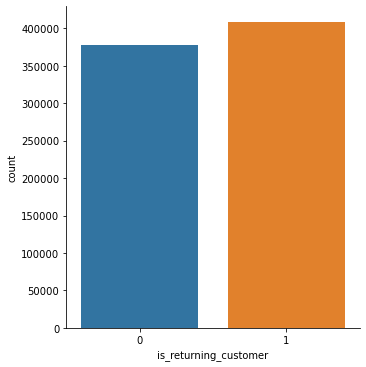

In [46]:
sns.catplot(data=order_data_labeled, kind="count", x="is_returning_customer")